### Starting to learn about sci-kit Learning library 
#### We will train multiple Machine Learning algorithms over the training data to predict the survival on our testing data and analyze the results thus obtained.

In [41]:
import numpy as np
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()

# features and their labels 
print("Features: ", iris.data[:5])  
print("Labels: ", iris.target[:5])  


Features:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:  [0 0 0 0 0]


In [42]:
from sklearn import datasets
import pandas as pd


iris = datasets.load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target


data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [45]:
data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### handling with missing values in dataset using sci-kit learn

In [46]:
from sklearn.impute import SimpleImputer
import numpy as np

data = {
    'Feature1':[1,2,3,np.nan,5],
    'Feature2':[4,5,6,np.nan,6],
    'Feature3':[7,np.nan,9,np.nan,8]
}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1.0,4.0,7.0
1,2.0,5.0,NaN
2,3.0,6.0,9.0
3,NaN,NaN,NaN
4,5.0,6.0,8.0


In [47]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,Feature1,Feature2,Feature3
0,1.00,4.00,7.0
1,2.00,5.00,8.0
2,3.00,6.00,9.0
3,2.75,5.25,8.0
4,5.00,6.00,8.0


In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
imputer_age = SimpleImputer(strategy='mean')
titanic_data['Age'] = imputer_age.fit_transform(titanic_data[['Age']])

titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
numerical_columns = ['Age', 'Fare']
titanic_data[numerical_columns].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### **Standardization:** 
This process adjusts the values of each column in such a way that their mean becomes zero and their variance becomes one. This is particularly useful for features with different scales.

### **Normalization:**
This process ensures that the values of each feature fall within a specific range (e.g., [0, 1]). Normalization is beneficial for algorithms that rely on distance (such as KNN and SVM).

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_columns = ['Age', 'Fare']

# Standardize the selected columns
scaler_standard = StandardScaler()
titanic_data[numerical_columns] = scaler_standard.fit_transform(titanic_data[numerical_columns])

print("\nData after Standardization:")
print(titanic_data[numerical_columns].head())

# Normalize the selected columns to the range [0, 1]
scaler_minmax = MinMaxScaler()
titanic_data[numerical_columns] = scaler_minmax.fit_transform(titanic_data[numerical_columns])

print("\nData after Min-Max Normalization:")
titanic_data[numerical_columns].head()



Data after Standardization:
        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337

Data after Min-Max Normalization:


,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713



Summary Statistics (After Scaling):
              Age        Fare
count  891.000000  891.000000
mean     0.367921    0.062858
std      0.163383    0.096995
min      0.000000    0.000000
25%      0.271174    0.015440
50%      0.367921    0.028213
75%      0.434531    0.060508
max      1.000000    1.000000


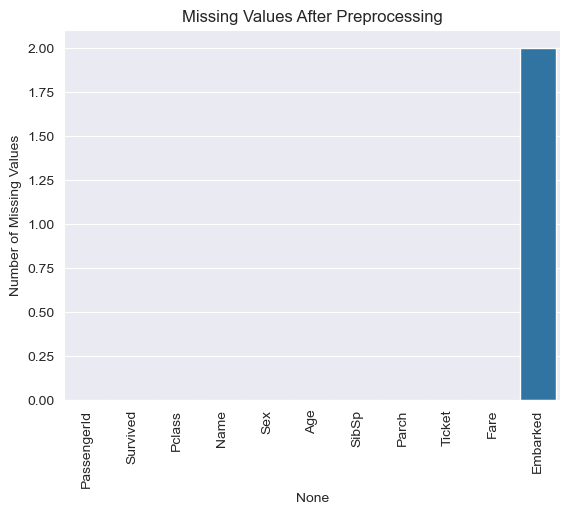

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values again
missing_values = titanic_data.isnull().sum()

# Plot missing values
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values After Preprocessing')
plt.show()
